# Decision Trees: Tree-Based Classification

> **"Decision trees make complex decisions simple and interpretable."**

## Learning Objectives
- Understand how decision trees work and their mathematical foundation
- Implement decision tree algorithm from scratch
- Learn about splitting criteria (Gini, entropy, information gain)
- Master tree pruning and overfitting prevention
- Apply decision trees to classification and regression problems


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Decision Tree Fundamentals

### What is a Decision Tree?
A decision tree is a flowchart-like structure where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or decision.

### Key Concepts

#### 1. Splitting Criteria
- **Gini Impurity**: Measures the probability of misclassifying a randomly chosen element
- **Entropy**: Measures the amount of information in a dataset
- **Information Gain**: Reduction in entropy after a split

#### 2. Stopping Criteria
- Maximum depth
- Minimum samples per leaf
- Minimum samples to split
- Maximum number of leaf nodes


Iris Dataset Overview:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Training set shape: (105, 4)
Test set shape: (45, 4)

Decision Tree Performance:
Accuracy: 0.978


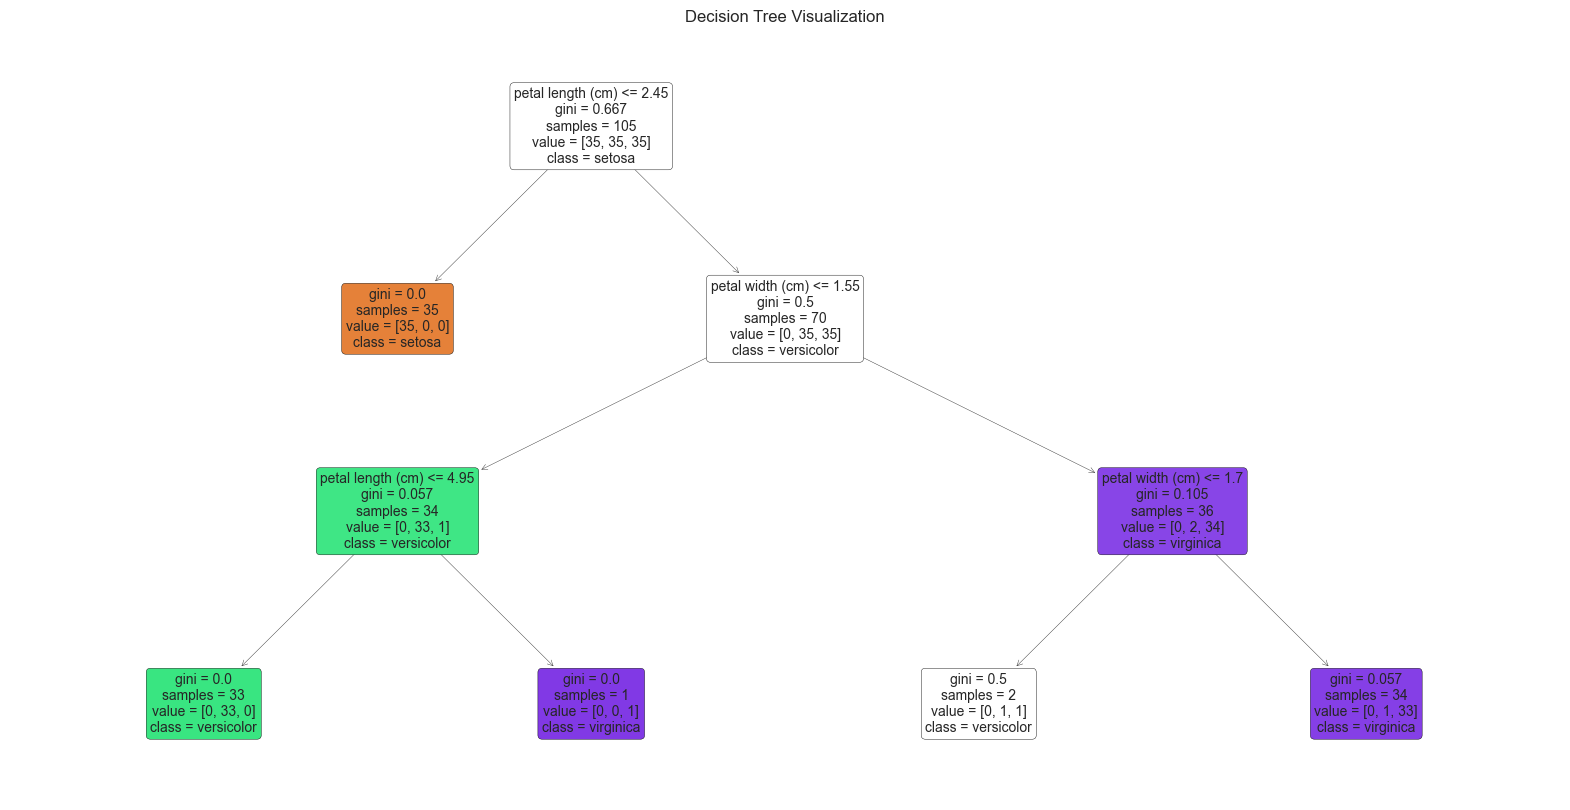


Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2



In [2]:
# Load Iris dataset for demonstration
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print("Iris Dataset Overview:")
print("=" * 50)
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train decision tree
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nDecision Tree Performance:")
print(f"Accuracy: {accuracy:.3f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Print tree rules
print("\nDecision Tree Rules:")
print("=" * 50)
tree_rules = export_text(dt_classifier, feature_names=feature_names)
print(tree_rules)


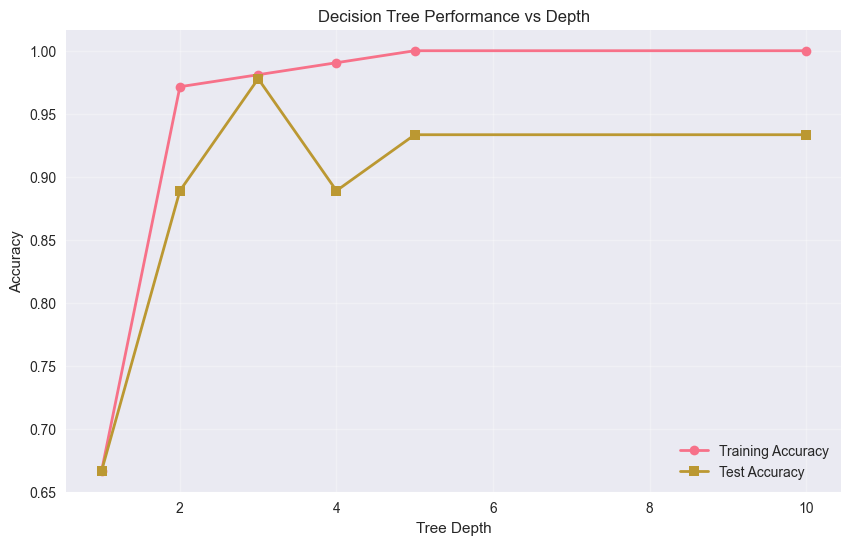

Accuracy by Tree Depth:
Depth 1: Train=0.667, Test=0.667
Depth 2: Train=0.971, Test=0.889
Depth 3: Train=0.981, Test=0.978
Depth 4: Train=0.990, Test=0.889
Depth 5: Train=1.000, Test=0.933
Depth 10: Train=1.000, Test=0.933

Feature Importance:
sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.551
petal width (cm): 0.449


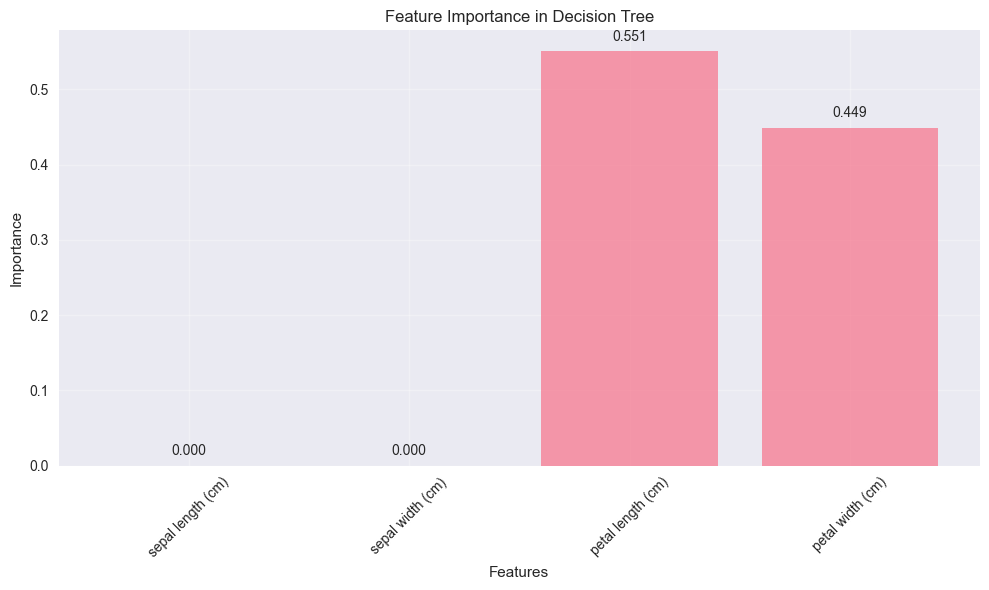

In [3]:
# Compare different tree depths
depths = [1, 2, 3, 4, 5, 10]
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Train model
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_accuracies, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Accuracy by Tree Depth:")
print("=" * 40)
for i, depth in enumerate(depths):
    print(f"Depth {depth}: Train={train_accuracies[i]:.3f}, Test={test_accuracies[i]:.3f}")

# Feature importance
feature_importance = dt_classifier.feature_importances_
print(f"\nFeature Importance:")
print("=" * 40)
for i, (feature, importance) in enumerate(zip(feature_names, feature_importance)):
    print(f"{feature}: {importance:.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, feature_importance, alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
